In [63]:
import sys
sys.path.append('../ptitprince/')
from collections import namedtuple
Circle = namedtuple("Circle", "x y r")
import pandas as pd
import numpy as np
import scipy as sp
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
from matplotlib.lines import Line2D
from math import log10
import math
from scipy.spatial.distance import pdist, squareform
from matplotlib.patches import Patch
import matplotlib.lines as mlines
from matplotlib import colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import os.path
import csv
import gc
import copy
import os

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [64]:
DATA_DIR="/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results"
#robots = [4, 6]
seeds = [i for i in range(0, 30)]
print(seeds)
robots = [2,4,6,10,20,40,60,80,100]
rab_ranges = [4,8,12]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [65]:
def get_name(n_robot,seed,range):
    fname = DATA_DIR +'/'+'perf_communication_congestion_'+str(range)+'_'+str(n_robot)+'_'+str(seed)+'.txt'
    print(fname)
    return fname

In [72]:
def column_position(n_robot,seed,range):
    fname = DATA_DIR +'/'+'pos_communication_congestion_'+str(range)+'_'+str(n_robot)+'_'+str(seed)+'.txt'
    print(fname)
    return fname

In [25]:

folder = r"/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/"
# Listing the files of a folder
print('Before rename')
files = os.listdir(folder)
print(files)

# rename each file one by one
for file_name in files:
    # construct full file path
    old_name = os.path.join(folder, file_name)

    # Changing the extension from txt to pdf
    new_name = old_name.replace('.000000_', '_')
    os.rename(old_name, new_name)

# print new names
print('After rename')
print(os.listdir(folder))


Before rename
['perf_communication_congestion_8.000000_80_0.txt', 'pos_communication_congestion_4.000000_20_8.txt', 'pos_communication_congestion_12.000000_6_18.txt', 'pos_communication_congestion_12.000000_4_17.txt', 'perf_communication_congestion_4.000000_80_3.txt', 'pos_communication_congestion_8.000000_2_12.txt', 'perf_communication_congestion_4.000000_8_8.txt', 'perf_communication_congestion_4.000000_8_6.txt', 'perf_out_6_23.txt', 'perf_out_60_18.txt', 'pos_out_40_11.txt', 'perf_communication_congestion_4.000000_40_11.txt', 'pos_communication_congestion_12.000000_8_7.txt', 'pos_out_80_19.txt', 'pos_communication_congestion_12.000000_40_13.txt', 'pos_communication_congestion_4.000000_10_26.txt', 'perf_out_6_29.txt', 'perf_communication_congestion_12.000000_40_1.txt', 'perf_communication_congestion_4.000000_2_6.txt', 'perf_communication_congestion_8.000000_80_14.txt', 'pos_communication_congestion_4.000000_80_6.txt', 'pos_communication_congestion_8.000000_40_28.txt', 'pos_out_2_16.t

In [26]:
def get_names_f(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('collision_'+str(k))
        n.append('conflicts_'+str(k))
        n.append('state_'+str(k))
        n.append('estimate_'+str(k))
        n.append('white_nei_agg_'+str(k))
        n.append('black_nei_agg_'+str(k))
        n.append('decision_flag_'+str(k))

    
    n.append('exp_finished')
    return n

In [67]:
def get_names_for_position(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('x_'+str(k))
        n.append('y_'+str(k))
        n.append('state_'+str(k))
    
    n.append('exp_finished')
    return n

Total collision per robot in the whole experiment, time_taken and estimate average. 

In [68]:
total_collision = pd.DataFrame()
total_time = pd.DataFrame()
total_conflicts = pd.DataFrame()

for robot in robots:
    for seed in seeds: 
        for range_ in rab_ranges:
            fname = get_name(robot,seed,range_)
            perf_frame = pd.read_csv(fname, sep=',', names=get_names_f(robot))
            df = pd.DataFrame(data=perf_frame)
            collision_sum = pd.DataFrame() 
            conflicts_sum = pd.DataFrame()
            time_ = pd.DataFrame()
        
            collision = df.filter(regex='collision').tail(1).reset_index(drop=True)
            collision_sum['exp_finished']  = df['exp_finished'].tail(1).reset_index(drop=True)
            collision_sum['collision_sum'] = collision.sum(axis='columns')/(robot*10)
            collision_sum['number_of_robots'] = robot
            collision_sum['seed'] = seed
            collision_sum['range'] = range_/10

            conflicts = df.filter(regex='conflicts').tail(1).reset_index(drop=True)
            conflicts_sum['exp_finished']  = df['exp_finished'].tail(1).reset_index(drop=True)
            conflicts_sum['conflicts_sum'] = conflicts.sum(axis='columns')/(robot*10)
            conflicts_sum['number_of_robots'] = robot
            conflicts_sum['seed'] = seed
            conflicts_sum['range'] = range_/10

            time_= df['exp_finished'].tail(1).reset_index()
            time_.rename(columns={'index':'time'}, inplace=True)
            time_['time'] = time_['time']/10
            time_['number_of_robots'] = robot
            time_['seed'] = seed
            time_['range'] = range_/10


            total_collision = pd.concat([total_collision,collision_sum], ignore_index=True) 
            total_conflicts = pd.concat([total_conflicts,conflicts_sum], ignore_index=True)    
            total_time = pd.concat([total_time,time_], ignore_index=True) 



# print(perf_frame)

#total collisions for experiment 
# print(perf_frame[)
print(total_collision)
print(total_time)
print(total_conflicts)




/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/perf_communication_congestion_4_2_0.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/perf_communication_congestion_8_2_0.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/perf_communication_congestion_12_2_0.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/perf_communication_congestion_4_2_1.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/perf_communication_congestion_8_2_1.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/perf_communication_congestion_12_2_1.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/perf_communication_congestion_4_2_2.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/perf_communication_congestion_

In [69]:
total_conflicts

,exp_finished,conflicts_sum,number_of_robots,seed,range
0,1,0.000,2,0,0.4
1,1,0.000,2,0,0.8
2,1,0.000,2,0,1.2
3,1,0.000,2,1,0.4
4,1,0.000,2,1,0.8
...,...,...,...,...,...
805,1,10.022,100,28,0.8
806,1,18.044,100,28,1.2
807,1,1.743,100,29,0.4
808,1,7.502,100,29,0.8


In [70]:
total_time.astype(bool).sum(axis=0)

time                810
exp_finished        810
number_of_robots    810
seed                783
range               810
dtype: int64

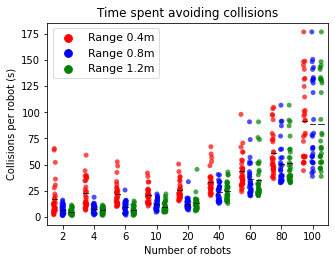

In [54]:
dx="number_of_robots"
dy="collision_sum"
dhue="range"
pal=["red","blue","green"]
data = total_collision

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Time spent avoiding collisions")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.8},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Collisions per robot (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("collision_time_spent.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

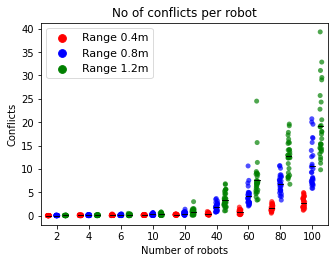

In [59]:
dx="number_of_robots"
dy="conflicts_sum"
dhue="range"
pal=["red","blue","green"]
data = total_conflicts

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("No of conflicts per robot")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.9},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Conflicts",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("conflicts.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

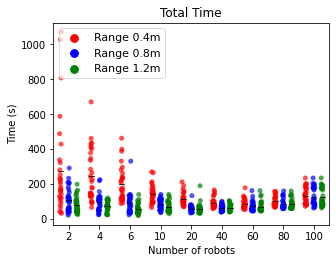

In [57]:
dx="number_of_robots"
dy="time"
dhue="range"
pal=["red","blue","green"]
data = total_time

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=5)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.8},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=12,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], ['Range 0.4m','Range 0.8m','Range 1.2m'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
plt.savefig("time_spent.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

In [43]:
t_conflicts = sns.load_dataset("total_conflicts").pivot("number_of_robots", "range", "conflicts_sum")
sns.heatmap(t_conflicts, cmap="crest")

ValueError: 'total_conflicts' is not one of the example datasets.

Per State analysis for time and collisions

In [ ]:
total_state_collision = pd.DataFrame()
total_state_time = pd.DataFrame()

for robot in robots:
    for seed in seeds: 

        fname = get_name(robot,seed)
        perf_frame = pd.read_csv(fname, sep=',', names=get_names_f(robot))
        df = pd.DataFrame(data=perf_frame)
        collision_state = pd.DataFrame() 
        time_per_state = pd.DataFrame()

        state = df.filter(regex='state')
        collision = df.filter(regex='collision').diff()

        state = state.melt(var_name='columns', value_name='index')
        collision = collision.melt(var_name='col_collision', value_name='ind_collision')
        collision_state = pd.concat([state,collision], axis = 1)
        collision_state.drop(collision_state.index[collision_state['ind_collision'] == 0], inplace = True)
        collision_state = collision_state.filter(regex=r'index|columns').reset_index(drop=True)


        state = pd.crosstab(index=state['index'], columns=state['columns'])
        collision_state = pd.crosstab(index=collision_state['index'], columns=collision_state['columns'])
        state["sum"] = state.sum(axis=1)/(robot*10)
        collision_state["sum"] = collision_state.sum(axis=1)/(robot*10)

        state = state.drop(state.columns[0:state.shape[1]-1], axis=1)
        collision_state = collision_state.drop(collision_state.columns[0:collision_state.shape[1]-1], axis=1)

        state['state'] = state.index 
        collision_state['state'] = collision_state.index

        state['seed'] = [seed]*state.shape[0]
        state['number_of_robots'] = [robot]*state.shape[0]
        collision_state['seed'] = [seed]*collision_state.shape[0]
        collision_state['number_of_robots'] = [robot]*collision_state.shape[0]

        total_state_time = pd.concat([total_state_time,state])
        total_state_collision = pd.concat([total_state_collision,collision_state])



total_state_time.sort_values(by=['state'], inplace=True)
total_state_collision.sort_values(by=['state'], inplace=True)

total_state_time_black = total_state_time.filter(regex='black',axis=0)
total_state_collision_black = total_state_collision.filter(regex='black',axis=0)
total_state_time_white = total_state_time.filter(regex='white',axis=0)
total_state_collision_white = total_state_collision.filter(regex='white',axis=0)


/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/results/perf_out_2_1.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/results/perf_out_2_2.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/results/perf_out_2_3.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/results/perf_out_2_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/results/perf_out_2_5.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/results/perf_out_2_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/results/perf_out_2_7.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/results/perf_out_2_8.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/results/perf_out_2_9.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/results/perf_out_2_10.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/results/perf

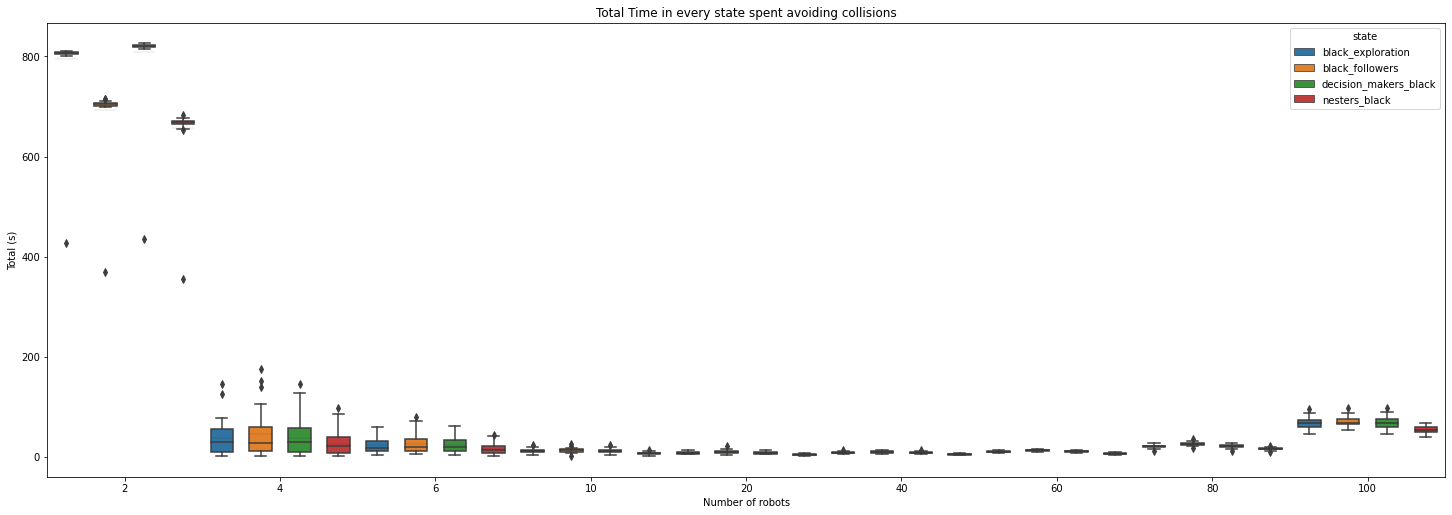

In [ ]:
dx="number_of_robots"
dy="sum"
dhue="state"
pal=["red","blue","green","orange","yellow","black","pink","purple"]
data = total_state_time_black

f, ax = plt.subplots(figsize=(20,7))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time in every state spent avoiding collisions")




# sns.stripplot(x=dx, 
#               y=dy,  
#               hue=dhue,
#               data=data,
#               ax=ax,
#               alpha=0.69,
#               jitter=0.1,
#               palette=pal,
#               dodge=True,
#               size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.1},
            medianprops={'visible': True},
            whiskerprops={'visible': True},
            zorder=50,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=True,
            showbox=True,
            showcaps=True,
            width=1,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:9], ['black_follower','Success'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
# plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

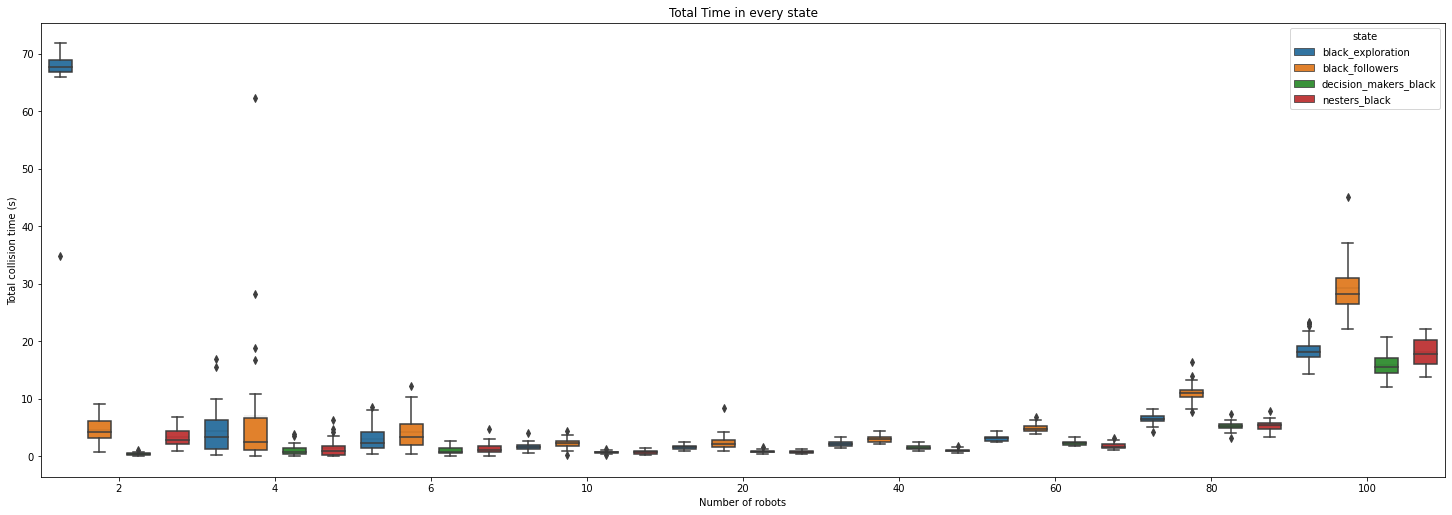

In [ ]:
dx="number_of_robots"
dy="sum"
dhue="state"
pal=["red","blue","green","orange","yellow","black","pink","purple"]
data = total_state_collision_black

f, ax = plt.subplots(figsize=(20,7))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time in every state")




# sns.stripplot(x=dx, 
#               y=dy,  
#               hue=dhue,
#               data=data,
#               ax=ax,
#               alpha=0.69,
#               jitter=0.1,
#               palette=pal,
#               dodge=True,
#               size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.1},
            medianprops={'visible': True},
            whiskerprops={'visible': True},
            zorder=50,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=True,
            showbox=True,
            showcaps=True,
            width=1,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:9], ['black_follower','Success'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total collision time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
# plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

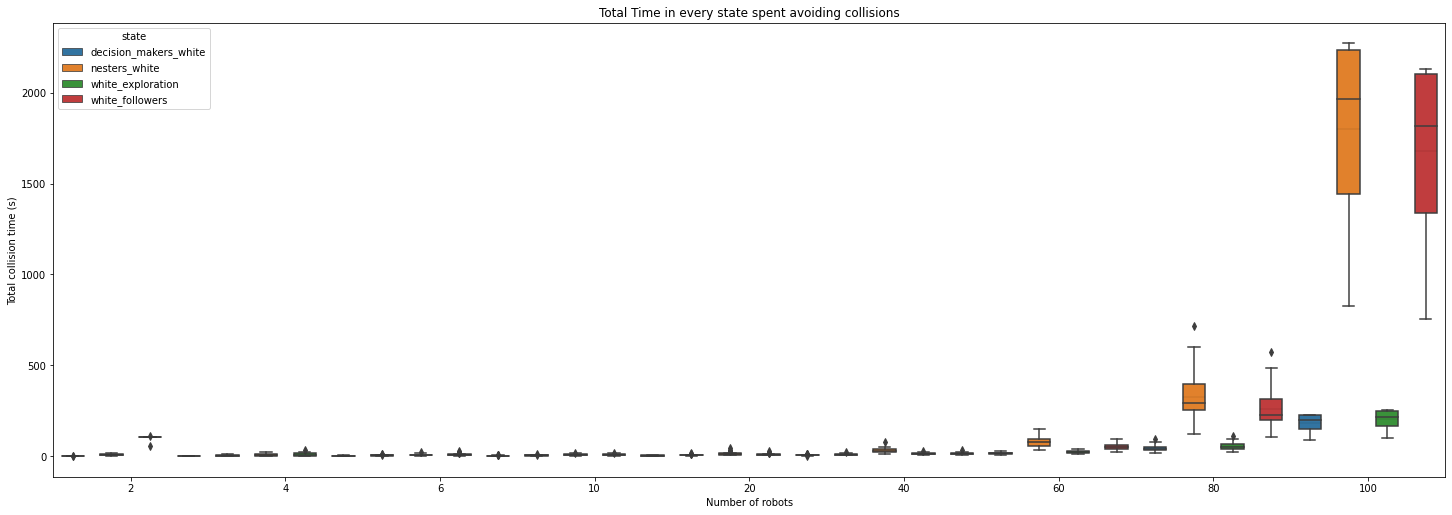

In [ ]:
dx="number_of_robots"
dy="sum"
dhue="state"
pal=["red","blue","green","orange","yellow","black","pink","purple"]
data = total_state_collision_white

f, ax = plt.subplots(figsize=(20,7))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time in every state spent avoiding collisions")




# sns.stripplot(x=dx, 
#               y=dy,  
#               hue=dhue,
#               data=data,
#               ax=ax,
#               alpha=0.69,
#               jitter=0.1,
#               palette=pal,
#               dodge=True,
#               size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.1},
            medianprops={'visible': True},
            whiskerprops={'visible': True},
            zorder=50,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=True,
            showbox=True,
            showcaps=True,
            width=1,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:9], ['black_follower','Success'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total collision time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
# plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()
        

Visitation frequency in a grid fashion 


In [74]:

for robot in robots:
   for seed in seeds:
        for range_ in rab_ranges:

         black_values = ['black_followers','nesters_black','decision_makers_black','black_exploration']
         white_values = ['white_followers','nesters_white','decision_makers_white','white_exploration']


         fname = column_position(robot,seed,range_)
         print(fname)
         pos_frame = pd.read_csv(fname, sep=',', names=get_names_for_position(robot))

         df = pd.DataFrame(pos_frame)
         df.drop(df.filter(regex='time').columns, axis=1, inplace=True)
         df.drop(df.filter(regex='id').columns, axis=1, inplace=True)
         df.drop(df.filter(regex='seed').columns, axis=1, inplace=True)
         df.drop(df.filter(regex='no_of_robots').columns, axis=1, inplace=True)
         df.drop(df.filter(regex='exp_finished').columns, axis=1, inplace=True)
         state = df.filter(regex='state').melt()

         df.drop(df.filter(regex='state').columns, axis=1, inplace=True)

         positionalDf = df.groupby(np.arange(len(df.columns)) // 2, axis=1).apply(lambda x: pd.Series([np.array(i) for i in x.values]))
         positionalDf = positionalDf.melt()
         positionalDf = positionalDf.rename(columns={"variable": "robot", "value": "position"})
         positionalDf["state"] = state["value"]

         positionalDf_black = positionalDf.loc[positionalDf['state'].isin(black_values)].reset_index(drop=True)
         positionalDf_white = positionalDf.loc[positionalDf['state'].isin(white_values)].reset_index(drop=True)

         x = list(positionalDf_white['position'].apply(lambda x: x[0]))
         y = list(positionalDf_white['position'].apply(lambda y: y[1]))

         f, ax = plt.subplots(figsize=(5.5,4.75))
         plt.rc('xtick', labelsize=10) 
         plt.rc('ytick', labelsize=10) 
         plt.title("Heatmap for white robots:" + str(robot) + " seed: "+str(seed))
         heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
         extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
         plt.imshow(heatmap, origin='lower', extent=extent)
         plt.colorbar()
         plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
         ax.set_ylabel("x (m)",fontsize=10)
         ax.set_xlabel("y (m)",fontsize=10)
         plt.tight_layout(pad=0.1)
         plt.savefig("heatmap_white_comm_congestion"+str(range_)+"_"+str(robot)+"_"+str(seed)+".pdf", dpi=600, format="pdf", transparent=False)
         plt.clf()        

         x = list(positionalDf_black['position'].apply(lambda x: x[0]))
         y = list(positionalDf_black['position'].apply(lambda y: y[1]))

         heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
        
         f, ax = plt.subplots(figsize=(5.5,4.75))
         plt.rc('xtick', labelsize=10) 
         plt.rc('ytick', labelsize=10) 
         plt.title("Heatmap for black robots:" + str(robot) + " seed: "+str(seed))
         heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
         extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
         plt.imshow(heatmap, origin='lower', extent=extent)
         plt.colorbar()
         plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.80], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
         plt.tight_layout(pad=1)
         ax.set_ylabel("x (m)",fontsize=10)
         ax.set_xlabel("y (m)",fontsize=10)
         plt.tight_layout(pad=0.1)
         plt.plot([1, 1], [-2, 1.8], [-1,-1], [-2, 1.8], color='black', linewidth=2, marker = 'o', linestyle = 'dashed')
         plt.savefig("heatmap_black_comm_congestion"+str(range_)+"_"+str(robot)+"_"+str(seed)+".pdf", dpi=600, format="pdf", transparent=False)
         plt.clf()





/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_4_2_0.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_4_2_0.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_8_2_0.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_8_2_0.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_12_2_0.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_12_2_0.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_4_2_1.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_4_2_1.tx

/tmp/ipykernel_101808/3159663649.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=(5.5,4.75))


/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_12_2_3.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_12_2_3.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_4_2_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_4_2_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_8_2_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_8_2_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_12_2_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/results/pos_communication_congestion_12_2_4.

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

<Figure size 396x342 with 0 Axes>

[-2.0, 1.799999999999999, -2.0, 1.799999999999999]


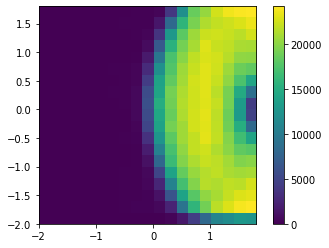

In [ ]:

# plt.show()

[-2.0, 1.799999999999999, -2.0, 1.799999999999999]


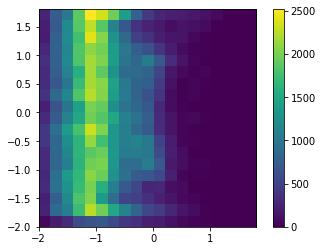

In [ ]:
x = list(positionalDf_black['position'].apply(lambda x: x[0]))
y = list(positionalDf_black['position'].apply(lambda y: y[1]))

# print(positionalDf_black['position'])
# print(x)
# print(y)

heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.arange(-2,2,0.2),np.arange(-2,2,0.2)])
print(extent)
plt.imshow(heatmap, origin='lower', extent=extent)

#plt.clim(0,30000) 
plt.colorbar()
plt.savefig("heatmap_black.pdf", dpi=600, format="pdf", transparent=False)
# plt.show()